In [1]:
xdim = [(-0.1,-0.2), (0.5,0.5), (-0.5,0.2),(-0.25,0.5),(0.2,0.1),(0,0.8)]
ldim = [-1,1,-1,-1,1,1]

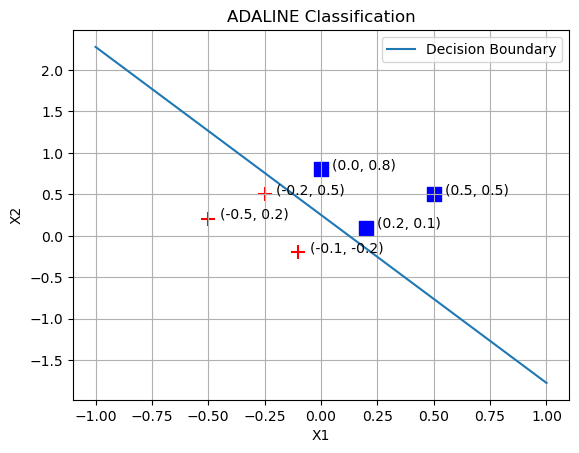

[0.0105 0.003 ] 0.0 1


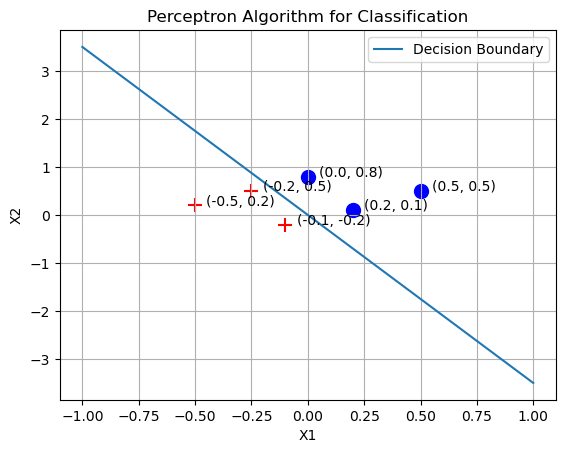

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from untitled import Perceptron 
class Adaline:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_output = np.dot(X, self.weights) + self.bias
            errors = y - linear_output
            self.weights += self.learning_rate * np.dot(X.T, errors) / n_samples
            self.bias += self.learning_rate * np.sum(errors) / n_samples

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0.0, 1, 0)
    def show(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Visualizes the classification results of the Perceptron algorithm.
    
        Args:
            X (np.ndarray): The input features, shape (n_samples, n_features).
            y (np.ndarray): The true labels, shape (n_samples,).
        """
        # Generate points for the decision boundary
        x_values = np.linspace(-1, 1, 10)
        decision_boundary = -(self.weights[0] * x_values + self.bias) / self.weights[1]
    
        # Plot the decision boundary
        plt.plot(x_values, decision_boundary, label='Decision Boundary')
    
        # Plot each point in the dataset
        for point, label in zip(X, y):
            marker = 's' if label == 1 else '+'
            color = 'blue' if label == 1 else 'red'
            plt.scatter(point[0], point[1], marker=marker, color=color, s=100)
            plt.text(point[0] + 0.05, point[1], f'({point[0]:.1f}, {point[1]:.1f})')
    
        # Set plot limits and labels

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('ADALINE Classification')
        plt.grid(True)
        plt.legend()
        plt.show()

if __name__ == "__main__":
    # 生成一些示例数据
    #from sklearn.datasets import make_blobs
    #X, y = make_blobs(n_samples=100, centers=2, random_state=42)
    X=np.array(xdim)
    y=np.array(ldim)
    
    # 创建并训练ADALINE模型
    model_A = Adaline(learning_rate=0.01, n_iter=1000)
    model_A.fit(X, y)
        
    # 预测
    predictions = model_A.predict(X)
    model_A.show(X,y)

    model_P=Perceptron(learning_rate=0.01)
    model_P.fit(X,y)

    predictions_P= model_P.predict(X)
    model_P.show(X,y)
    # 可视化结果